# SOK-1006 V25
## Forelesning 1 (med løsning) - Enkel bruk av Python i mikroøkonomisk analyse

### 1. Definer og tegn en funksjon
Her skal vi definere en funksjon $y=f(x,a)$ hvor $a$ er en parameter som forteller oss om forholdet mellom input $x$ og output $y$. La oss ta eksempelet $y=x^a$, som vi har lyst å tegne.

In [54]:
# import pakkene som vi trenger for å tegne en figur
import numpy as np
from matplotlib import pyplot as plt

In [55]:
# definer funksjonen
def fn(x,a):
    return x**a

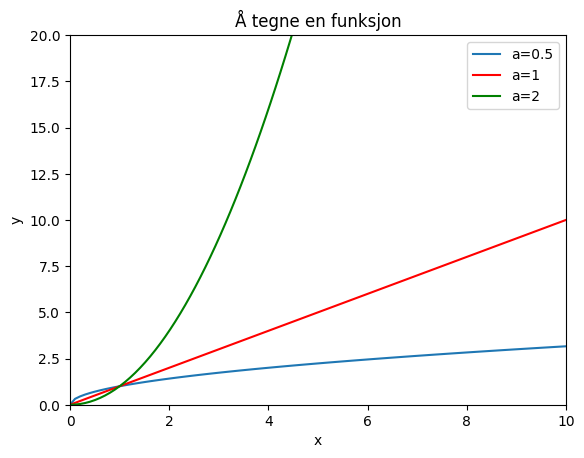

In [56]:
# tegn funksjonen

# først lager vi vår x variabel 0-10
x = np.linspace(0,10,100)


fig,ax=plt.subplots()

ax.set_ylabel('y')
ax.set_xlabel('x')

# tegn funksjonen for forskjellige verdier på a
# a=0.5, 1 og 2

ax.plot(x,fn(x, 0.5),label='a=0.5')
ax.plot(x,fn(x, 1), color="red", label='a=1')
ax.plot(x,fn(x, 2), color="green", label='a=2')

# Vi kan begrense aksene om vi vil 

ax.set(xlim=(0,10))
ax.set(ylim=(0,20))

# gi en passende tittel

ax.set_title('Å tegne en funksjon')

#legend:
ax.legend(loc='upper right')


plt.show()


Det er noe tungvindt å definere plottet funksjon tre ganger, og vi kan forbedre med ei løkke:

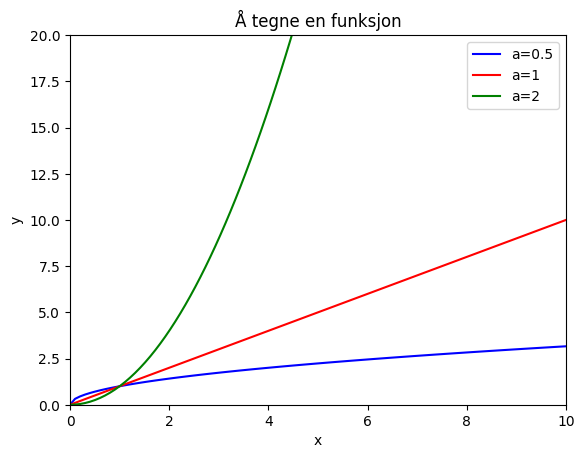

In [57]:
x = np.linspace(0,10,100)
fig,ax=plt.subplots()

ax.set_ylabel('y')
ax.set_xlabel('x')

# Definer a verdier
a_verdier = [0.5, 1, 2]
colors = ['blue', 'red', 'green']  # farge for hver plott

# Plott med løkke
# bruk zip() for å koble sammen verdi med farge
for a, color in zip(a_verdier, colors):
    ax.plot(x, fn(x, a), color=color, label=f'a={a}')

# Limit the range of axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 20)

# gi en passende tittel

ax.set_title('Å tegne en funksjon')

#legend:
ax.legend(loc='upper right')


plt.show()


Vi kan også tegne figurene ved siden av hverandre.


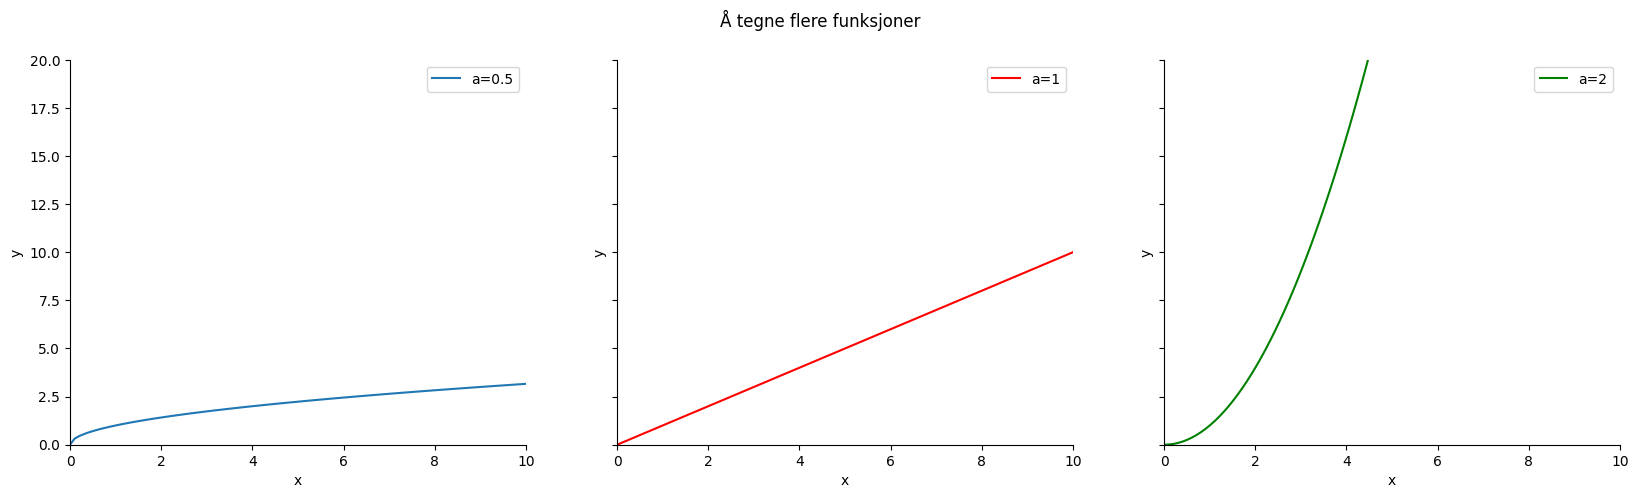

In [58]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(20,5))

ax1.set_ylabel('y')
ax1.set_xlabel('x')

ax2.set_ylabel('y')
ax2.set_xlabel('x')

ax3.set_ylabel('y')
ax3.set_xlabel('x')

# tegn funksjonen for forskjellige verdier på a
# a=0.5, 1 og 2

ax1.plot(x,fn(x, 0.5),label='a=0.5')
ax2.plot(x,fn(x, 1), color="red", label='a=1')
ax3.plot(x,fn(x, 2), color="green", label='a=2')

# Begrense aksene og start fra (0,0)


ax1.set(xlim=(0,10),ylim=(0,20))

ax2.set(xlim=(0,10),ylim=(0,20))

ax3.set(xlim=(0,10),ylim=(0,20))

# Vi tar bort linjene øverst og til høyre

ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')

ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')

ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')

# gi en passende tittel

fig.suptitle('Å tegne flere funksjoner')

#legend:
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')


plt.show()

La oss gjøre det samme ved hjelp av en løkke istedenfor manuelt.

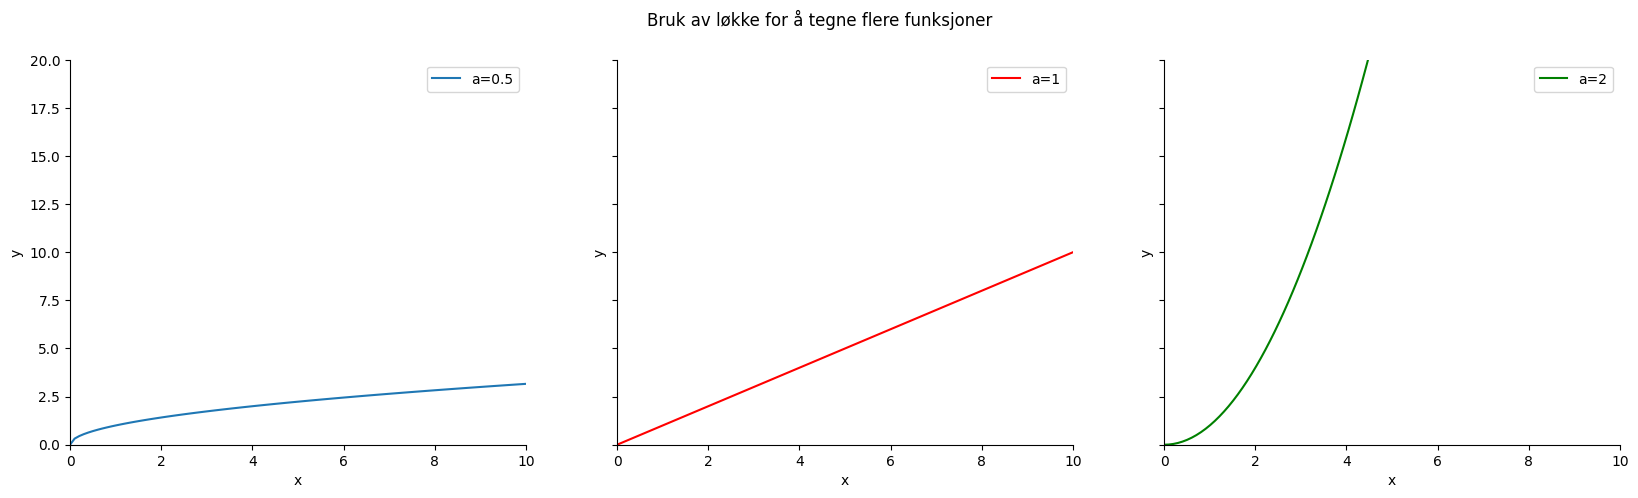

In [59]:
# bruk axs for å definere aksene

fig, axs = plt.subplots(1,3, sharey=True, figsize=(20,5))

# plott av linjene

axs[0].plot(x,fn(x, 0.5),label='a=0.5')
axs[1].plot(x,fn(x, 1), color="red", label='a=1')
axs[2].plot(x,fn(x, 2), color="green", label='a=2')

# bruk løkke for å tegne aksene

for i in range(3):

    axs[i].set_ylabel('y')
    axs[i].set_xlabel('x')
    axs[i].set(xlim=(0,10),ylim=(0,20))
    axs[i].spines['top'].set_color('none')
    axs[i].spines['right'].set_color('none')
    axs[i].legend(loc='best')

# gi en passende tittel

fig.suptitle('Bruk av løkke for å tegne flere funksjoner')

plt.show()

Vi tar tegningen av funksjonslikning inn i løkka. Legg merke til at vi har nå plassert "x" lengst til høyre på aksen, og "y" øverst og rotert. Vi har også fått tegnet inn y-verdiene på aksene i hver figur (axs[i].tick_params(labelleft=True)).

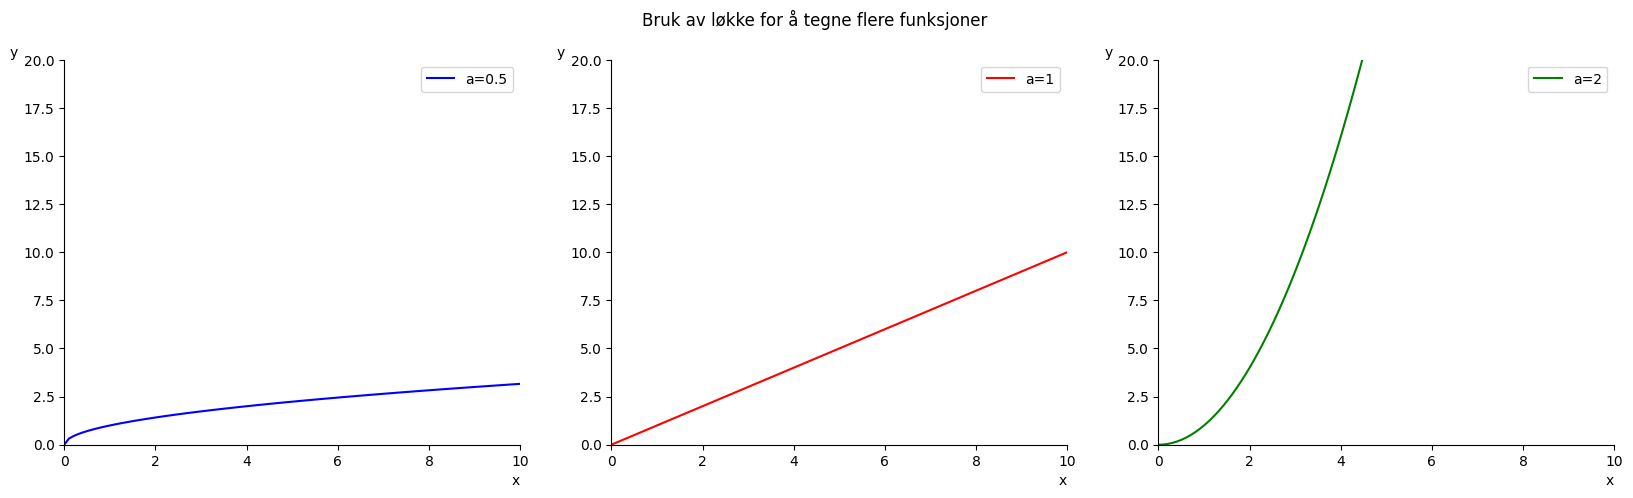

In [60]:

x = np.linspace(0, 10, 100)


fig, axs = plt.subplots(1, 3, sharey=True, figsize=(20, 5))


a_verdier = [0.5, 1, 2]
colors = ['blue', 'red', 'green']

# enumerate brukes her for å koble indeks i til hvert par av( a, color)
for i, (a, color) in enumerate(zip(a_verdier, colors)):
    axs[i].plot(x, fn(x, a), color=color, label=f'a={a}')
    axs[i].set_ylabel('y', loc='top', rotation=0)
    axs[i].set_xlabel('x', loc= 'right')
    axs[i].set(xlim=(0, 10), ylim=(0, 20))
    axs[i].tick_params(labelleft=True)
    axs[i].spines['top'].set_color('none')
    axs[i].spines['right'].set_color('none')
    axs[i].legend(loc='best')


fig.suptitle('Bruk av løkke for å tegne flere funksjoner')


plt.show()


### 2. Derivasjon og likningsløsning
Vi kan derivere med hjelp av Sympy. La oss fortsette med eksempelet $y=x^a$ som vi har allerede definert. Vi importerer pakken og så definerer symbolene som vi trenger.

In [61]:
from sympy import *

# spesifiser bokstavene som vi kommer til å bruke
x, y, a = symbols('x y a', positive=True, real=True)

# deriver mhp x

diff(fn(x,a), x)


a*x**a/x

Vi ser at denne deriverten ikke blir gjengitt på enklest måte. Vi kan bruke simplify() her:

In [62]:
simplify(diff(fn(x,a), x))

a*x**(a - 1)

In [63]:
# vi kan også derivere mhp a
simplify(diff(fn(x,a), a))

x**a*log(x)

La oss sette opp en profittfunksjon med pris p og grensekostnad c per enhet. Funksjonen fn(x,a) er produktfunksjonen.

In [64]:
# definer nye symboler
p, c = symbols('p, c', positive=True, real=True)
# definer uttrykket:

profitt = p*fn(x,a) - c*x

# deriver mhp x
d_prof_1=diff(profitt, x)

display (d_prof_1)

a*p*x**a/x - c

In [65]:
# Sett opp førsteordensbetingelsen

foc=Eq(d_prof_1,0)
foc


Eq(a*p*x**a/x - c, 0)

In [66]:
# Løs foc

opt_x = solve(foc, x)[0]
opt_x


(c/(a*p))**(1/(a - 1))

Da har vi at mengden som løser førsteordensbetingelsen er $x= \left( \frac{c}{ap} \right)^\frac{1}{a-1}$. Vi må sjekke at dette er et maximumspunkt ved å beregne den andrederiverte som må være negativ.

In [67]:
d_prof_2=diff(profitt, x, 2)
d_prof_2

a*p*x**a*(a - 1)/x**2

In [68]:
solve (d_prof_2 <0, a)

a < 1

For å oppnå et maksimum må vi ha $a < 1$. Gitt at dette er oppfylt er optimal produksjon $x= \left( \frac{c}{ap} \right)^\frac{1}{a-1}$. Dette gir maksmimal profitt på

In [69]:
maks_profitt = (profitt.subs(x, opt_x))
maks_profitt

-c*(c/(a*p))**(1/(a - 1)) + p*((c/(a*p))**(1/(a - 1)))**a

Vi kan sette inn noen verdier for våre parametre og lage en pen tabell med noen funn:

In [70]:
import pandas as pd

# anta at a=0.5
a_verdi = 0.5

# lag verdier av våre funksjoner med denne verdien på a

opt_x_a = opt_x.subs(a, a_verdi)
maks_profitt_a = maks_profitt.subs(a, a_verdi)

# lag verdier på p og c

p_verdier = [5, 10, 15]
c_verdier = [1, 2, 3]

# vi lagrer våre verdier i en tabell
# begynn med en tom tabell

data =[]

# for hver kombinasjon av p og c skal vi beregne opt_x og maks_profitt og legge i tabellen

for p_val in p_verdier:
    for c_val in c_verdier:
        opt_x_sim = opt_x_a.subs({p: p_val, c: c_val}).evalf(2)
        maks_profitt_sim = maks_profitt_a.subs({p: p_val, c: c_val}).evalf(2)
        data.append({'p': p_val, 'c': c_val, 'Mengde': opt_x_sim, 'Profitt': maks_profitt_sim})

# lag en dataframe med pandas

df = pd.DataFrame(data)
# vi vil sortere etter p og c, men dette gjøres automatisk i dette eksempelet
# dersom vi vil endre kan vi skrive: df.sort_values(by=['p', 'c'], inplace=True)
 
df


,p,c,Mengde,Profitt
0,5,1,6.3,6.3
1,5,2,1.6,3.1
2,5,3,0.69,2.1
3,10,1,25.,25.
4,10,2,6.3,13.
5,10,3,2.8,8.3
6,15,1,56.,56.
7,15,2,14.,28.
8,15,3,6.3,19.


### 3. Løse likningssystem
La oss løse to likninger med to ukjente. Tenk at vi har to likninger $(1) p= 10-0.5x, (2) p=2+x.$ La oss sette opp disse likningene og løse for x og p.

In [71]:
eq_1=Eq(10-0.5*x, p)
eq_2=Eq(2+x, p)

solve ((eq_1, eq_2), (p,x))

{p: 7.33333333333333, x: 5.33333333333333}

Løsningen her er et oppslag (dictionary).

### 4. Oppgave         
I forelesningsnotatene blir dere bedt om å tegne inntekt og kostnad for en bedrift som selger sitt produkt til en pris $p=10$, med kostnad per enhet innsats $c=1$, og hvor produktfunksjonen $y=x^a$ brukes med $a=0.5$.

In [72]:
# løsningsforslag

# definer inntekt og kostnad

def inntekt(x):
    return 10*fn(x,0.5)

def kostnad(x):
    return x

# profitt

def pi(x):
    return inntekt(x)-kostnad(x)


# Finner krysningspunktene mellom inntekt og kostnad

# med sympy
x=symbols('x')
null_profitt = solve(pi(x), x)
null_profitt

[0.0, 100.000000000000]

In [74]:
type(null_profitt)

list

Nå vet vi at profitten er null for x=0 of x=100. Dette vil vi tegne i figuren. Tallene i `null_profitt` er fra sympy i listeform og må oversettes i plott-koden med `float()`.

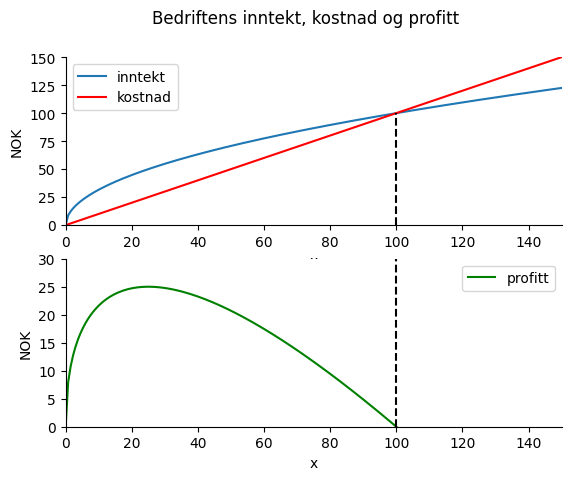

In [73]:
x = np.linspace(0,150,200)

fig, axs = plt.subplots(2, 1, sharex=True)
                        
axs[0].plot(x, inntekt(x), label='inntekt')
axs[0].plot(x, kostnad(x), 'r', label='kostnad')
axs[1].plot(x, pi(x), 'g', label='profitt')

# Tegne stiplet linje fra krysningspunktet ned til x-aksen i figurene

axs[1].axvline(x=float(null_profitt[1]), color='black', linestyle='--')

axs[0].plot(
    [float(null_profitt[1]), float(null_profitt[1])],  # x-koordinater
    [0, kostnad(float(null_profitt[1]))],            # y-koordinater
    color='black',
    linestyle='--'
)


# bruk løkke for å tegne aksene

for i in range(2):

    axs[i].set_ylabel('NOK')
    axs[i].set_xlabel('x')
    axs[i].spines['top'].set_color('none')
    axs[i].spines['right'].set_color('none')
    axs[i].tick_params(labelbottom=True)
    axs[i].legend(loc='best')

axs[0].set(xlim=(0,150),ylim=(0,150))
axs[1].set(xlim=(0,150),ylim=(0,30))

# gi en passende tittel

fig.suptitle('Bedriftens inntekt, kostnad og profitt')

plt.show()